In [125]:
# Handin 1
# C is the inverse of regularization strength; must be a positive float.
# Like in support vector machines, smaller values specify stronger regularization.
# C = 1 / lambda = 1 / 0.1 = 10

In [126]:
# Iris data set
from sklearn.datasets import load_iris

iris = load_iris()
iris_X, iris_y = iris['data'], iris['target']

# There are 3 classes:
#     0 setosa
#     1 versicolour
#     2 virginica
# There are 4 real-valued features -sepal  length and width, petal length and width.

In [127]:
# Voting data set
# There are 2 classes:
#    0 rebublician
#    1 democrate
# There are 16 0 or 1 valued features (different properties of voters)
import pickle as cp
import numpy as np

# load data for voting
voting_X, voting_y = cp.load(open('voting.pickle', 'rb'))

In [128]:
# separate train and test data (80% vs 20%) and shuffle
def get_shuffled_data(X: np.ndarray,
                      y: np.ndarray) -> tuple :
    N, D = X.shape
    N_train = int(0.8 * N)

    shuffler = np.random.permutation(N)

    X_train = X[shuffler[:N_train]]
    y_train = y[shuffler[:N_train]]

    X_test = X[shuffler[N_train:]]
    y_test = y[shuffler[N_train:]]
    
    return X_train, y_train, X_test, y_test


In [129]:
voting_X_train, voting_y_train, voting_X_test, voting_y_test = get_shuffled_data(voting_X, voting_y)
#print(voting_X.shape)
# print(voting_X_train.shape)
# print(voting_X_test.shape)

In [130]:
iris_X_train, iris_y_train, iris_X_test, iris_y_test = get_shuffled_data(iris_X, iris_y)
#print(type(get_shuffled_data(iris_X, iris_y)))
#print(iris_X.shape)
# print(iris_X_train.shape)
# print(iris_X_test.shape)

In [131]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# calculate MSE on whole test set using percent_to_train % of training data
def get_test_mse(X_train: np.ndarray, y_train: np.ndarray,
                 X_test: np.ndarray, y_test: np.ndarray,
                 percent_to_train: int) -> float :
    
    N_train, D = X_train.shape
    N_train_small = int(percent_to_train * 0.01  * N_train)
    
    #print(N_train)
    #print(N_train_small)
    
    X_train_small = X_train[:N_train_small]
    y_train_small = y_train[:N_train_small]
    
    log_reg = linear_model.LogisticRegression(C = 10)

    log_reg.fit(X_train_small, y_train_small)
    
    #print(log_reg.predict(X_test))
    #print(y_test)
    return mean_squared_error(log_reg.predict(X_test), y_test)
    # return log_reg.score(X_test, y_test)
  
# print(get_test_mse(voting_X_train, voting_y_train, voting_X_test, voting_y_test, 20))

In [170]:
# do rand_perm_cnt random permutations of a train set
# and average out the test error across the runs
# allso return training data sizes used for a single run (10%, 20%, ..., 100%)
def get_avg_mses(X: np.ndarray, y: np.ndarray,
                 rand_perm_cnt: int, k_upper_bound: int) :
    i = 0
    all_mses = []
    tr_data_sizes = []
    while i < rand_perm_cnt :
        X_train, y_train, X_test, y_test = get_shuffled_data(X, y)
        
        # Train 10 classifiers, where the k-th classifier is trained using 10k% of the training data.
        # For each classifier store the classification error on the test set
        mse_list = []
        for k in range(1, k_upper_bound) :
            mse_list.append(get_test_mse(X_train, y_train, X_test, y_test, k * 10))
        
        all_mses.append(mse_list)
        i = i + 1
        if i == 1 :
            N_train, D = X_train.shape
            for k in range(1, k_upper_bound) :
                tr_data_sizes.append(N_train * k * 0.1)
    
    all_mses = np.asarray(all_mses)
    avg_mses = all_mses.mean(axis=0)
    
    return avg_mses, tr_data_sizes


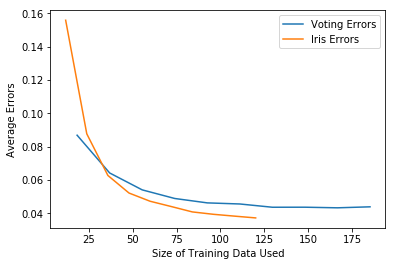

In [172]:
# Handin 2
import matplotlib.pyplot as plt

# get average test errors on voting data
voting_avg_mses, voting_tr_data_sizes = get_avg_mses(voting_X, voting_y, 1000, 11)

# get average test errors on voting data
iris_avg_mses, iris_tr_data_sizes = get_avg_mses(iris_X, iris_y, 1000, 11)

# and plot them as a function of the size of the training data.

plt.plot(voting_tr_data_sizes, voting_avg_mses, label = "Voting Errors") 
plt.plot(iris_tr_data_sizes, iris_avg_mses, label = "Iris Errors")

plt.legend(loc=1)

plt.xlabel('Size of Training Data Used')
plt.ylabel('Average Errors')

plt.show()